# **CRASH ANALYTICS FOR MONTGOMERY COUNTY🚗📊**

## Team: Tanay Shah, Ishaan Kalra, Aadesh Kheria

### **Contribution**
Member 1: Tanay Shah - Contribution 100%

Member 2: Aadesh Kheria - Contribution 100%

Member 3: Ishaan Kalra - Contribution 100%

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

Aadesh Kheria - May 7 2024
Ishaan Kalra - May 7 2024
Tanay Shah - May 7 2024

### **Project Question🤨:**  

### How effectively can machine learning models predict hit-and-run incidents based on driver behavior and environmental factors, and what strategies can be implemented to improve their predictive accuracy ?

### **Project Brief** 

The primary goal of this project is to conduct a comprehensive analysis of traffic crash data across Montgomery County from 2015 to 2023. Our focus is on using machine learning to predict hit-and-run incidents and improve the accuracy of these predictions.

By examining monthly trends over these years, we aim to provide the UMD community and the general public with insights into the most prevalent types of traffic incidents, including hit-and-run cases, along with the locations and times they most frequently occur.

Throughout this project, we will explore potential correlations between the types of crashes, driver behaviors, environmental factors, and their specific locations. We will also analyze how the frequency of these incidents varies at different hours and during different seasons. Our objective is to uncover meaningful trends that can inform safety improvements and awareness initiatives within the community, with a particular focus on reducing and better predicting hit-and-run incidents.

This approach will not only help in understanding the dynamics of traffic incidents but also in developing strategies to enhance predictive models for better safety outcomes.

### **Required Tools**
You will need to install the following librairies for this project:
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- scipy

Using the median to impute missing values in "Mile Point" for robustness against skewed data and outliers.

# **Dataset Collection & Preprocessing**

**1. DATA COLLECTION:**

This is the initial stage of our data lifecycle, focusing on the systematic collection of data from established datasets or various files.

In this project, we sourced our data directly from the Montgomery County Government's open data portal. The specific dataset used, titled "Crash Reporting Incidents Data," is available for direct download at [https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf/about_data](https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf/about_data). This comprehensive dataset contains detailed records of traffic incidents reported in Montgomery County, which serves as a foundational element for our analysis.

For managing and manipulating the downloaded CSV file, we utilized the following tools:

- `pandas`: for robust data manipulation and analysis.
- `numpy`: for high-level mathematical functions and operations on arrays.
- `datetime`: for handling date and time data.
- `os.path`: for managing file paths.

Our process involves downloading the CSV file directly from the provided link, which ensures that we have the complete and up-to-date dataset. We then load this data into a pandas DataFrame, enabling us to perform detailed analyses and manipulations as required by our project’s objectives.

Below, we will detail the steps involved in processing the data to demonstrate how we prepare and analyze the data for our needs.

--------------------------------------------------------------------------------

In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

In [3]:
crash_df = pd.read_csv('crash.csv')
crash_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,06/30/2023 10:55:00 PM,No,NaN,NaN,NaN,NaN,...,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,39.244280,-77.335827,"(39.24428009, -77.33582666)"
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,06/30/2023 08:00:00 PM,No,County,1.42,West,North,...,NaN,INTERSECTION,FOUR-WAY INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.092024,-77.070570,"(39.09202433, -77.0705695)"
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,06/29/2023 11:53:00 AM,No,Maryland (State),11.26,North,North,...,CURB,NON INTERSECTION,NaN,INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.277424,-77.324644,"(39.27742352, -77.32464379)"
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,07/01/2023 01:48:00 AM,Yes,Municipality,0.07,North,North,...,LIGHT SUPPORT POLE,OTHER,FOUR-WAY INTERSECTION,OTHER,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.074974,-77.113130,"(39.07497432, -77.1131297)"
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,07/01/2023 12:52:00 PM,No,Other Public Roadway,0.00,West,West,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.026492,-77.148288,"(39.02649167, -77.14828833)"


In [4]:
rows, cols = crash_df.shape
print("Rows: " + str(rows) + "\n" + "Columns: " + str(cols))

Rows: 97458
Columns: 44


In [5]:
for col_names in crash_df.columns:
  print(col_names, end=", ")

Report Number, Local Case Number, Agency Name, ACRS Report Type, Crash Date/Time, Hit/Run, Route Type, Mile Point, Mile Point Direction, Lane Direction, Lane Number, Lane Type, Number of Lanes, Direction, Distance, Distance Unit, Road Grade, NonTraffic, Road Name, Cross-Street Type, Cross-Street Name, Off-Road Description, Municipality, Related Non-Motorist, At Fault, Collision Type, Weather, Surface Condition, Light, Traffic Control, Driver Substance Abuse, Non-Motorist Substance Abuse, First Harmful Event, Second Harmful Event, Fixed Oject Struck, Junction, Intersection Type, Intersection Area, Road Alignment, Road Condition, Road Division, Latitude, Longitude, Location, 

In [6]:
# Find the earliest date
earliest_date = crash_df['Crash Date/Time'].min()

# Find the latest date
latest_date = crash_df['Crash Date/Time'].max()

# Print the results
print("Earliest crash date:", earliest_date)
print("Latest crash date:", latest_date)

Earliest crash date: 01/01/2015 01:10:00 AM
Latest crash date: 12/31/2023 12:19:00 AM


**2. DATA PREPROCESSING:**

This phase is crucial for preparing the raw data into a format suitable for analysis. Given the extensive nature of the dataset and our specific research objectives, we adopted a selective approach to data preprocessing to ensure efficiency and relevance in our analysis.

### Column Selection:
Initially, we identified and retained only the most pertinent columns from the complete dataset. This was done to reduce computational load and focus on the data most relevant to our research questions. The selected columns include identifiers like 'Report Number' and 'Local Case Number', details about the crash such as 'Crash Date/Time', 'Collision Type', and environmental conditions like 'Weather' and 'Light'. 

### Data Cleaning:
The following steps were taken to clean and prepare the data:

- **Conversion to Suitable Data Types**: We converted the 'Crash Date/Time' column into a datetime format, allowing us to extract and analyze the date and time separately.
- **Handling Missing Values**: We filled missing values in categorical columns like 'Hit/Run' and 'Route Type' with the most frequent values or categorized them as 'Unknown'. Numeric fields such as 'Mile Point' were filled using median values to maintain data integrity.
- **Imputation Techniques**: For more complex fields like 'Traffic Control' and 'Light', where data might depend on other factors such as 'Road Name' or the time of the crash, we used group-specific modes and conditional imputation. This approach helps maintain logical consistency across related data fields.
- **Normalization and Error Correction**: We also addressed duplicates and corrected erroneous entries to ensure the uniqueness and accuracy of our data records.

### Enhancing Data Quality:
To further enhance the quality of our dataset, we employed several strategies:
- **Mode Imputation for Categorical Data**: We imputed missing values in 'Weather' and 'Collision Type' using the most common values conditioned on related attributes, ensuring that our data reflects realistic and probable scenarios.
- **Custom Functions for Data Imputation**: For attributes like 'Traffic Control' and 'Light', custom functions were developed to impute values based on the derived rules from the data itself. This method provided a nuanced approach to handling missing data, particularly in cases where simple imputation might not suffice.

### Final Dataset Preparation:
After these steps, the dataset was transformed into a cleaner, more manageable format, making it ready for the subsequent stages of data analysis and visualization. The focus on careful preprocessing ensures that our findings are based on accurate and representative data, thereby enhancing the reliability of our conclusions.

In [7]:
columns_to_keep = [
    'Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
    'Crash Date/Time', 'Hit/Run', 'Route Type', 'Mile Point', 'Lane Direction',
    'Lane Number', 'Number of Lanes', 'Direction', 'Road Name', 'Cross-Street Name',
    'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Latitude', 'Longitude', 'At Fault', 'Driver Substance Abuse'
]

filtered_df = crash_df[columns_to_keep].copy()
filtered_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Driver Substance Abuse
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,06/30/2023 10:55:00 PM,No,NaN,NaN,NaN,0,...,DRIVER,SINGLE VEHICLE,CLEAR,NaN,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,NONE DETECTED
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,06/30/2023 08:00:00 PM,No,County,1.42,North,1,...,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,NONE DETECTED
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,06/29/2023 11:53:00 AM,No,Maryland (State),11.26,North,1,...,DRIVER,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,NONE DETECTED
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,07/01/2023 01:48:00 AM,Yes,Municipality,0.07,North,1,...,UNKNOWN,OTHER,CLOUDY,DRY,DARK LIGHTS ON,NaN,39.074974,-77.113130,UNKNOWN,NaN
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,07/01/2023 12:52:00 PM,No,Other Public Roadway,0.00,West,1,...,DRIVER,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NaN,39.026492,-77.148288,DRIVER,NaN


In [8]:
info = filtered_df.count()
print(info)

Report Number             97458
Local Case Number         97458
Agency Name               97458
ACRS Report Type          97458
Crash Date/Time           97458
Hit/Run                   97456
Route Type                84463
Mile Point                85120
Lane Direction            85131
Lane Number               97458
Number of Lanes           97458
Direction                 85120
Road Name                 85130
Cross-Street Name         85120
At Fault                  97458
Collision Type            96954
Weather                   89511
Surface Condition         82808
Light                     96643
Traffic Control           81022
Latitude                  97458
Longitude                 97458
At Fault                  97458
Driver Substance Abuse    81860
dtype: int64


In [9]:
null_counts_corrected = filtered_df.isnull().sum()
null_counts_corrected

Report Number                 0
Local Case Number             0
Agency Name                   0
ACRS Report Type              0
Crash Date/Time               0
Hit/Run                       2
Route Type                12995
Mile Point                12338
Lane Direction            12327
Lane Number                   0
Number of Lanes               0
Direction                 12338
Road Name                 12328
Cross-Street Name         12338
At Fault                      0
Collision Type              504
Weather                    7947
Surface Condition         14650
Light                       815
Traffic Control           16436
Latitude                      0
Longitude                     0
At Fault                      0
Driver Substance Abuse    15598
dtype: int64

In [10]:
print(filtered_df.duplicated().sum())

0


In [11]:
filtered_df["Crash Date/Time"] = pd.to_datetime(filtered_df["Crash Date/Time"])

filtered_df.loc[:,'Crash Date'] = filtered_df['Crash Date/Time'].dt.date
filtered_df.loc[:,'Crash Time'] = filtered_df['Crash Date/Time'].dt.time

filtered_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Driver Substance Abuse,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,NaN,NaN,NaN,0,...,CLEAR,NaN,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,NONE DETECTED,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,NONE DETECTED,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,NONE DETECTED,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,CLOUDY,DRY,DARK LIGHTS ON,NaN,39.074974,-77.113130,UNKNOWN,NaN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,CLEAR,DRY,DAYLIGHT,NaN,39.026492,-77.148288,DRIVER,NaN,2023-07-01,12:52:00


In [12]:
hit_run_mode = filtered_df['Hit/Run'].mode()[0]
filtered_df['Hit/Run'] = filtered_df['Hit/Run'].fillna(hit_run_mode)
na_hit = filtered_df[filtered_df['Hit/Run'].isna()]
na_hit.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Driver Substance Abuse,Crash Date,Crash Time


In [13]:
filtered_df['Route Type'] = filtered_df['Route Type'].fillna('Unknown')
filtered_df['Route Type'].value_counts()

Maryland (State)        39119
County                  32674
Unknown                 13009
Municipality             5777
US (State)               3732
Interstate (State)       1647
Other Public Roadway      707
Government                414
Ramp                      357
Service Road               22
Name: Route Type, dtype: int64

In [14]:
mile_point_median = filtered_df['Mile Point'].median()
print("The median for Mile Point's data is: " + str(mile_point_median))
filtered_df['Mile Point'] = filtered_df['Mile Point'].fillna(mile_point_median)
filtered_df.head()

The median for Mile Point's data is: 1.95


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Driver Substance Abuse,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,NaN,0,...,CLEAR,NaN,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,NONE DETECTED,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,NONE DETECTED,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,NONE DETECTED,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,CLOUDY,DRY,DARK LIGHTS ON,NaN,39.074974,-77.113130,UNKNOWN,NaN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,CLEAR,DRY,DAYLIGHT,NaN,39.026492,-77.148288,DRIVER,NaN,2023-07-01,12:52:00


In [15]:
for i in ['Lane Direction', 'Road Name', 'Cross-Street Name', 'Route Type', 'Direction', 'Surface Condition']:
  filtered_df[i] = filtered_df[i].fillna('Unknown')

filtered_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Driver Substance Abuse,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,CLEAR,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,NONE DETECTED,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,NONE DETECTED,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,NONE DETECTED,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,CLOUDY,DRY,DARK LIGHTS ON,NaN,39.074974,-77.113130,UNKNOWN,NaN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,CLEAR,DRY,DAYLIGHT,NaN,39.026492,-77.148288,DRIVER,NaN,2023-07-01,12:52:00


Since "Lane Direction" indicates the direction of the lane in which the incident occurred, I recognize it as a significant piece of information that can affect the understanding of each crash's context. However, without a clear way to deduce the missing directions from other data (unless there's a discernible pattern or correlation with other variables), my safest approach would be to impute these missing values with a placeholder value such as "Unknown". This method acknowledges the missing data without making assumptions that could introduce bias into my analysis.

In [16]:
traffic_control_mapping = filtered_df.groupby('Road Name')['Traffic Control'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

def impute_traffic_control(row):
    if pd.isna(row['Traffic Control']) and row['Road Name'] in traffic_control_mapping:
        return traffic_control_mapping[row['Road Name']]
    else:
        return row['Traffic Control']

filtered_df['Traffic Control'] = filtered_df.apply(impute_traffic_control, axis=1)

filtered_df['Traffic Control'] = filtered_df['Traffic Control'].fillna('Unknown')

filtered_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Driver Substance Abuse,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,CLEAR,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,NONE DETECTED,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,NONE DETECTED,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,NONE DETECTED,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,CLOUDY,DRY,DARK LIGHTS ON,NO CONTROLS,39.074974,-77.113130,UNKNOWN,NaN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,CLEAR,DRY,DAYLIGHT,Unknown,39.026492,-77.148288,DRIVER,NaN,2023-07-01,12:52:00


In [17]:
def impute_light_condition(row):
    if pd.isna(row['Light']):
        crash_time = row['Crash Time']

        daylight_start = datetime.time(6, 0)
        daylight_end = datetime.time(18, 0)
        dusk_end = datetime.time(19, 0)
        dawn_start = datetime.time(5, 0)

        if daylight_start <= crash_time <= daylight_end:
            return 'DAYLIGHT'
        elif daylight_end < crash_time <= dusk_end:
            return 'DUSK'
        elif dawn_start <= crash_time < daylight_start:
            return 'DAWN'
        else:

            return 'DARK -- UNKNOWN LIGHTING'

    else:
        return row['Light']


if not isinstance(filtered_df['Crash Time'].iloc[0], datetime.time):
    filtered_df['Crash Time'] = pd.to_datetime(filtered_df['Crash Time'], format='%H:%M:%S').dt.time

filtered_df['Light'] = filtered_df.apply(impute_light_condition, axis=1)
filtered_df.head(n=10)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Driver Substance Abuse,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,CLEAR,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,NONE DETECTED,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,NONE DETECTED,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,NONE DETECTED,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,CLOUDY,DRY,DARK LIGHTS ON,NO CONTROLS,39.074974,-77.113130,UNKNOWN,NaN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,CLEAR,DRY,DAYLIGHT,Unknown,39.026492,-77.148288,DRIVER,NaN,2023-07-01,12:52:00
5,MCP2667008J,230031246,Montgomery County Police,Property Damage Crash,2023-06-30 12:00:00,No,County,0.73,North,1,...,CLEAR,DRY,DAYLIGHT,NO CONTROLS,39.168515,-77.204770,DRIVER,NONE DETECTED,2023-06-30,12:00:00
6,MCP243600GV,230031419,Montgomery County Police,Property Damage Crash,2023-06-30 18:00:00,Yes,County,1.15,East,0,...,CLEAR,DRY,DAYLIGHT,NO CONTROLS,39.017985,-77.018535,DRIVER,UNKNOWN,2023-06-30,18:00:00
7,HA2287000N,23001253,Maryland-National Capital,Property Damage Crash,2023-06-29 13:03:00,No,Unknown,1.95,Unknown,0,...,CLEAR,Unknown,DAYLIGHT,NO CONTROLS,39.199238,-77.296527,DRIVER,NONE DETECTED,2023-06-29,13:03:00
8,MCP33730012,230030580,Montgomery County Police,Injury Crash,2023-06-26 16:26:00,No,County,0.94,South,1,...,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008755,-77.040745,DRIVER,NONE DETECTED,2023-06-26,16:26:00
9,MCP3376000Y,230031077,Montgomery County Police,Property Damage Crash,2023-06-29 12:59:00,No,Unknown,1.95,Unknown,0,...,CLEAR,Unknown,DAYLIGHT,NO CONTROLS,39.155839,-77.091168,DRIVER,NONE DETECTED,2023-06-29,12:59:00


This code first checks if the "Light" column is missing a value for a given row. If it is, it then determines the light condition based on the "Crash Time" compared to predefined time ranges that represent daylight, dusk, and dawn. For times outside of these ranges, it defaults to "DARK -- UNKNOWN LIGHTING" to reflect a conservative approach during nighttime hours. This method helps to fill in missing data with reasoned assumptions while minimizing potential biases that could arise from more arbitrary imputations.

In [18]:
weather_mode = filtered_df['Weather'].mode()[0]
filtered_df['Weather'] = filtered_df['Weather'].fillna(weather_mode)

filtered_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Driver Substance Abuse,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,CLEAR,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,NONE DETECTED,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,NONE DETECTED,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,NONE DETECTED,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,CLOUDY,DRY,DARK LIGHTS ON,NO CONTROLS,39.074974,-77.113130,UNKNOWN,NaN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,CLEAR,DRY,DAYLIGHT,Unknown,39.026492,-77.148288,DRIVER,NaN,2023-07-01,12:52:00


In [19]:
collision_type_by_weather = filtered_df.groupby('Weather')['Collision Type'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

def impute_collision_type(row):
    if pd.isna(row['Collision Type']):
        return collision_type_by_weather.get(row['Weather'], np.nan)
    else:
        return row['Collision Type']

filtered_df['Collision Type'] = filtered_df.apply(impute_collision_type, axis=1)

filtered_df['Collision Type'] = filtered_df['Collision Type'].fillna('Unknown')

The code determines the most common "Collision Type" for each "Weather" condition by grouping the data by "Weather" and calculating the mode of "Collision Type" within each group. This mapping of "Weather" conditions to the most frequent "Collision Type" is stored as a dictionary. Next, the user defines a function that checks if "Collision Type" is missing for a row; if it is, the function attempts to impute the missing value using the "Weather"-to-"Collision Type" mapping. This function is applied to each row of the DataFrame. If "Collision Type" is missing and the row's "Weather" is found in the mapping, the missing "Collision Type" is imputed with the most common type associated with that weather condition. In the end, if still Collision types are missing then they are replaced with the "Unkown" tag to remove bias from the table.

In [20]:
null_counts_corrected = filtered_df.isnull().sum()
print(null_counts_corrected)
print("No Cases with NULL values left! -> Data is somewhat cleansed :)")

Report Number                 0
Local Case Number             0
Agency Name                   0
ACRS Report Type              0
Crash Date/Time               0
Hit/Run                       0
Route Type                    0
Mile Point                    0
Lane Direction                0
Lane Number                   0
Number of Lanes               0
Direction                     0
Road Name                     0
Cross-Street Name             0
At Fault                      0
Collision Type                0
Weather                       0
Surface Condition             0
Light                         0
Traffic Control               0
Latitude                      0
Longitude                     0
At Fault                      0
Driver Substance Abuse    15598
Crash Date                    0
Crash Time                    0
dtype: int64
No Cases with NULL values left! -> Data is somewhat cleansed :)


--------------------------------------------------------------------------------

# **Data Exploration and Summary Statistics**

This stage, often referred to as the Exploratory Analysis and Visualization phase of the data lifecycle, is where we dive deep into the dataset to uncover trends, test hypotheses, and draw insights. By utilizing statistical analysis and visual tools, we aim to validate our hypotheses and inform decision-making processes.

### Hypothesis Testing:
We have formulated several hypotheses to guide our analysis and ensure it addresses specific research questions about traffic incidents in Montgomery County. Here's how we are approaching each hypothesis:

1. **Light Conditions and Hit/Run Incidents:**
   - **Null Hypothesis (H0)**: There is no significant difference in the proportion of hit/run incidents between daylight and dark conditions.
   - **Alternative Hypothesis (H1)**: The proportion of hit/run incidents differs significantly between daylight and dark conditions.
   - **Analysis Approach**: We will use a Z-test for two proportions, as it is suitable for large sample sizes. This test will help us compare the rates of hit/run incidents under different lighting conditions.

2. **Weather Conditions and Crash Incidents:**
   - **Null Hypothesis (H0)**: There is no significant difference in the number of crash incidents during clear versus adverse weather conditions.
   - **Alternative Hypothesis (H1)**: There is a significant difference in the number of crash incidents between clear and adverse weather conditions.
   - **Analysis Approach**: Depending on data categorization and distribution, we might use a chi-square test for categorical data or a t-test for continuous data to compare crash incident rates across different weather conditions.

3. **Driver Substance Abuse vs Hit/Run:**
   - **Null Hypothesis (H0)**: There is no significant difference in the proportion of hit/run incidents between drivers with and without substance abuse.
   - **Alternative Hypothesis (H1)**: The proportion of hit/run incidents is significantly higher among drivers who have abused substances.
   - **Analysis Approach**: A chi-square test is used to determine if there's a significant association between substance abuse and hit-and-run incidents, focusing on the difference in proportions of such incidents between drivers who have and have not abused substances.

### Data Visualization:
In addition to hypothesis testing, we are employing various data visualization techniques to illustrate and explore potential trends within the dataset. This involves:

- **Plotting Key Trends**: We use graphs such as bar charts, line graphs, and scatter plots to visually represent the data, making it easier to identify patterns or anomalies.
- **Frequency Analysis**: By analyzing the frequency of specific types of incidents, such as hit/run or specific collision types, we can identify which scenarios occur most frequently and may require additional focus or preventive measures.

### Statistical Analysis:
We perform detailed statistical analyses to provide a robust foundation for our findings. This includes:
- **Descriptive Statistics**: To summarize the central tendencies and dispersion in our data.
- **Inferential Statistics**: To draw conclusions about the larger population from our sample data, specifically testing our hypotheses under different conditions.

By the end of this phase, we aim to have a clear understanding of the factors that influence traffic incidents in Montgomery County, guided by data-driven insights and rigorous statistical validation. This approach not only helps in affirming or refuting our initial hypotheses but also aids in identifying areas where traffic safety can be improved.

## **1.   Hypothesis: Light(Headlights) Conditions and Hit/Run Incidents**

*Null Hypothesis (H0): The proportion of hit/run incidents is the same during daylight and dark conditions.*

*Alternative Hypothesis (H1): The proportion of hit/run incidents during daylight is different from that during dark conditions.*

*Test to Use: A Z-test for two proportions would be appropriate if you have a large sample size, which is likely given that this is traffic incident data. This test will compare the proportion of hit/run incidents in daylight vs. dark conditions.*

In [21]:
crash_data = filtered_df.copy()
crash_data.loc[:, 'Hit_Run_Binary'] = (crash_data['Hit/Run'] == 'Yes').astype(int)

dark_condition_values = ['DARK LIGHTS ON', 'DARK NO LIGHTS', 'DUSK', 'DAWN', 'DARK -- UNKNOWN LIGHTING']

daylight_hitrun_count = crash_data.loc[crash_data['Light'] == 'DAYLIGHT', 'Hit_Run_Binary'].sum()
dark_hitrun_count = crash_data.loc[crash_data['Light'].isin(dark_condition_values), 'Hit_Run_Binary'].sum()

daylight_count = (crash_data['Light'] == 'DAYLIGHT').sum()
dark_count = crash_data['Light'].isin(dark_condition_values).sum()

if daylight_count > 0 and dark_count > 0:
    counts = np.array([daylight_hitrun_count, dark_hitrun_count])
    nobs = np.array([daylight_count, dark_count])
    stat, pval = proportions_ztest(counts, nobs)
else:
    stat, pval = None, None

print(f"Daylight Hit/Run Count: {daylight_hitrun_count}")
print(f"Dark Hit/Run Count: {dark_hitrun_count}")
print(f"Total Incidents in Daylight Conditions: {daylight_count}")
print(f"Total Incidents in Dark Conditions: {dark_count}")
print(f"Z-test Statistic: {stat}")
print(f"P-value: {pval}")
print("\n")
alpha = 0.05
if pval is not None:
    if pval < alpha:
        print("Reject the null hypothesis. The proportion of hit-and-run incidents is significantly different between daylight and dark conditions.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the proportion of hit-and-run incidents is significantly different between daylight and dark conditions.")
else:
    print("Unable to perform the hypothesis test due to insufficient data.")

Daylight Hit/Run Count: 10397
Dark Hit/Run Count: 7063
Total Incidents in Daylight Conditions: 63749
Total Incidents in Dark Conditions: 32790
Z-test Statistic: -19.997538937880513
P-value: 5.7857948679946774e-89


Reject the null hypothesis. The proportion of hit-and-run incidents is significantly different between daylight and dark conditions.


### **Conclusion**

The negative Z-test statistic indicates that the proportion of hit/run incidents in daylight conditions is lower than in dark conditions, and the extremely small p-value suggests that the difference is statistically significant. This means we reject the null hypothesis and accept the alternative hypothesis that the proportion of hit/run incidents during daylight is different from that during dark conditions.

### **Graph**

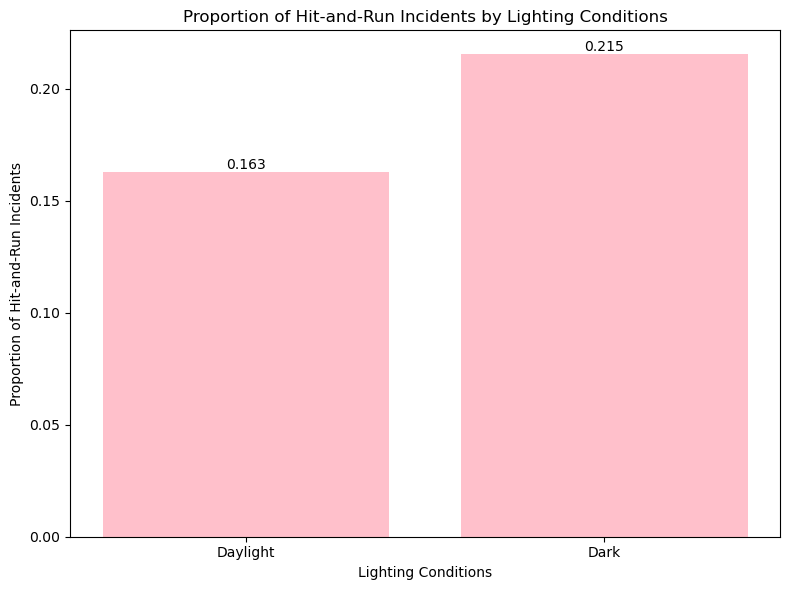

In [22]:
import matplotlib.pyplot as plt

daylight_proportion = daylight_hitrun_count / daylight_count
dark_proportion = dark_hitrun_count / dark_count

conditions = ['Daylight', 'Dark']
proportions = [daylight_proportion, dark_proportion]

plt.figure(figsize=(8, 6))
plt.bar(conditions, proportions, color = 'pink')
plt.xlabel('Lighting Conditions')
plt.ylabel('Proportion of Hit-and-Run Incidents')
plt.title('Proportion of Hit-and-Run Incidents by Lighting Conditions')

for i, proportion in enumerate(proportions):
    plt.text(i, proportion, f'{proportion:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **2.   Hypothesis: Weather Conditions and Crash Incidents**

*Null Hypothesis (H0)*: There is no significant difference in the number of crash incidents during clear weather conditions and during adverse weather conditions (e.g., rain, snow, fog).

⁠*Alternative Hypothesis (H1)*: There is a significant difference in the number of crash incidents between clear weather conditions and adverse weather conditions.

*Test to Use*: We use a chi-square test if we categorize days as either having clear or adverse weather and count the number of crash incidents on such days. For continuous data (e.g., number of incidents), a t-test could be applicable, for the data distribution.



In [23]:
def categorize_weather(condition):
    if condition == 'CLEAR':
        return 'clear'
    elif condition in ['UNKNOWN', 'OTHER']:
        return 'exclude'
    else:
        return 'adverse'


filtered_df = filtered_df.copy()
filtered_df['Weather_Condition'] = filtered_df['Weather'].apply(categorize_weather)


df_test2 = filtered_df[filtered_df['Weather_Condition'] != 'exclude']
incident_counts_clear = df_test2[df_test2['Weather_Condition'] == 'clear'].groupby('Crash Date/Time').size()
incident_counts_adverse = df_test2[df_test2['Weather_Condition'] == 'adverse'].groupby('Crash Date/Time').size()

print(f"incident_counts_clear: {incident_counts_clear.count()}, incident_counts_adverse: {incident_counts_adverse.count()}")
print("\n")

t_stat, p_val = ttest_ind(incident_counts_clear, incident_counts_adverse, equal_var=False, nan_policy='omit')


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")


alpha = 0.05
if p_val is not None:
    if p_val < alpha:
        print("Reject the null hypothesis. The proportion of hit-and-run incidents is significantly different between daylight and dark conditions.")
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the proportion of hit-and-run incidents is significantly different between daylight and dark conditions.")
else:
    print("Unable to perform the hypothesis test due to insufficient data.")

print("\n")

incident_counts_clear: 71915, incident_counts_adverse: 22693


T-statistic: 1.7106789081681824
P-value: 0.08714832492139055
Fail to reject the null hypothesis. There is not enough evidence to conclude that the proportion of hit-and-run incidents is significantly different between daylight and dark conditions.




### **Conclusion**

*  Based on the provided P-value of approximately 0.087, we would fail to reject the null hypothesis at a significance level of 0.05. This suggests that there is insufficient evidence to conclude a significant correlation between weather conditions and the number of crash incidents.

*  However, it's important to note that the P-value is close to the significance threshold, indicating a marginal level of significance. Therefore, while we do not have strong evidence to support a correlation between weather conditions and crash incidents, further investigation with a larger dataset or alternative analytical approaches may be warranted to confirm this finding conclusively.





### **Graph**

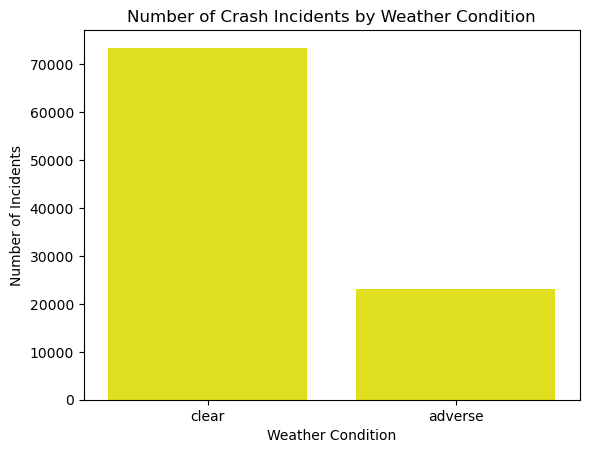

In [24]:
incident_counts = df_test2['Weather_Condition'].value_counts()
sns.barplot(x=incident_counts.index, y=incident_counts.values, color = 'yellow')
plt.title('Number of Crash Incidents by Weather Condition')
plt.ylabel('Number of Incidents')
plt.xlabel('Weather Condition')
plt.show()

## **3.   Hypothesis: Driver Substance Abuse vs Hit/Run**

⁠*Null Hypothesis (H0)*: There is no significant difference in the proportion of hit/run incidents between drivers with and without substance abuse.

*Alternative Hypothesis (H1)*: The proportion of hit/run incidents is significantly higher among drivers who have abused substances.

⁠*Test to Use*: A chi-square test is used to determine if there's a significant association between substance abuse and hit-and-run incidents, focusing on the difference in proportions of such incidents between drivers who have and have not abused substances.

In [25]:
# Load and prepare the dataset
df = pd.read_csv("crash.csv")

# Simplify and encode 'Driver Substance Abuse'
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].apply(
    lambda x: (
        "No"
        if pd.isna(x) or "NONE DETECTED" in x or "UNKNOWN" in x or "N/A" in x
        else "Yes"
    )
)
le = LabelEncoder()
df["Driver Substance Abuse"] = le.fit_transform(df["Driver Substance Abuse"])

# Impute missing values
imputer = KNNImputer(n_neighbors=5)
df["Driver Substance Abuse"] = imputer.fit_transform(df[["Driver Substance Abuse"]])

# Convert back to original categories
df["Driver Substance Abuse"] = le.inverse_transform(
    df["Driver Substance Abuse"].round().astype(int)
)


# Chi-square test and print results
def perform_chi_square(column):
    contingency_table = pd.crosstab(df[column], df["Hit/Run"])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-square Statistic for {column}: {chi2}, P-value: {p}")
    if p < 0.05:
        print(f"The null hypothesis can be rejected for {column}. There is a statistically significant association between {column} and hit-and-run incidents.")
    else:
        print(f"The null hypothesis cannot be rejected for {column}. There is no statistically significant association between {column} and hit-and-run incidents.")

perform_chi_square("Driver Substance Abuse")

Chi-square Statistic for Driver Substance Abuse: 81.65375509944661, P-value: 1.6214344512600915e-19
The null hypothesis can be rejected for Driver Substance Abuse. There is a statistically significant association between Driver Substance Abuse and hit-and-run incidents.


### **Conclusion**

- **Statistical Rejection of Null Hypothesis:** The chi-square test resulted in a significant statistic of 81.654 and a p-value of approximately \(1.62 \times 10^{-19}\), leading to the rejection of the null hypothesis and confirming a significant association between driver substance abuse and hit-and-run incidents.

- **Implications for Traffic Safety Initiatives:** The findings suggest that drivers who have abused substances are significantly more likely to be involved in hit-and-run incidents. This insight supports the need for targeted traffic safety initiatives that focus on substance abuse among drivers, including more stringent enforcement and preventive education.

### **Graph**

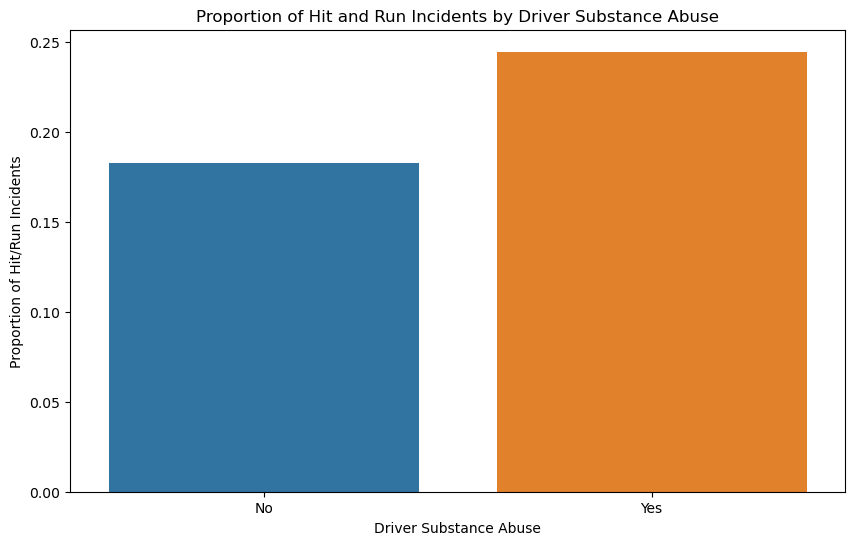

In [26]:
substance_hit_run = pd.crosstab(df["Driver Substance Abuse"], df["Hit/Run"])
substance_hit_run.columns = ["No Hit/Run", "Hit/Run"]

# Calculate proportions
substance_hit_run["Proportion Hit/Run"] = substance_hit_run["Hit/Run"] / (
    substance_hit_run["No Hit/Run"] + substance_hit_run["Hit/Run"]
)

# Plotting the proportion of hit-and-runs
plt.figure(figsize=(10, 6))
sns.barplot(x=substance_hit_run.index, y=substance_hit_run["Proportion Hit/Run"])
plt.title("Proportion of Hit and Run Incidents by Driver Substance Abuse")
plt.xlabel("Driver Substance Abuse")
plt.ylabel("Proportion of Hit/Run Incidents")
plt.xticks(
    ticks=[0, 1], labels=["No", "Yes"]
)  # Assuming 0 is 'No', 1 is 'Yes' after encoding
plt.show()

--------------------------------------------------------------------------------

# **PREDICTION MODEL THAT PREDICTS HIT/RUN**

The above section acts as a setting stage as to what we should analyze and predict using our ML. As our Project states we wish to analyze and predict the hit and run cases in Montogomery County.
>To stimulate proper predictions, the data is cleaned once again here (but only the relevant features are cleaned in order to achieve optimal outputs).

## Preliminary data cleaning

In [27]:
# Convert 'Crash Date/Time' to datetime and extract relevant parts
df["Crash Date/Time"] = pd.to_datetime(df["Crash Date/Time"])
df['Hour'] = df['Crash Date/Time'].dt.hour
df['Month'] = df['Crash Date/Time'].dt.month
df['DayOfWeek'] = df['Crash Date/Time'].dt.weekday

## Data Cleaning

In [28]:
# Assume these columns are relevant based on the description
relevant_columns = ['Weather', 'Light', 'Traffic Control', 'Road Condition', 'Surface Condition', 'Hour', 'Month', 'DayOfWeek', 'Hit/Run','Driver Substance Abuse']

# Filter the dataset
df = df[relevant_columns]

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables
categorical_features = ['Weather', 'Light', 'Traffic Control', 'Road Condition', 'Surface Condition', 'DayOfWeek', 'Month', 'Driver Substance Abuse']
df = pd.get_dummies(df, columns=categorical_features)

C:\Users\kheri\AppData\Local\Temp\ipykernel_2628\1431050830.py:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=categorical_features)
C:\Users\kheri\AppData\Local\Temp\ipykernel_2628\1431050830.py:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=categorical_features)


--------------------------------------------------------------------------------

## **ML Algorithm Design/Development**

### Prepare the target and features for the model

In [29]:
df['Hit/Run'] = (df['Hit/Run'] == 'Yes').astype(int)
y = df['Hit/Run']
X = df.drop('Hit/Run', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## **ML Algorithm Training and Test Data Analysis**

In this phase of the data lifecycle, we transition from exploratory analysis and hypothesis testing to applying machine learning techniques. The objective is to design and develop predictive models that can efficiently analyze patterns and predict outcomes based on historical data. For this project, we are particularly focused on evaluating the impact of driver substance abuse on hit-and-run incidents.

### Data Preparation for ML:
To prepare our dataset for machine learning analysis, we convert the 'Hit/Run' column into a binary format where 'Yes' is coded as 1 and 'No' as 0. This allows us to treat the problem as a binary classification task. We then define our target variable `y` as the 'Hit/Run' column and the feature matrix `X` as all other columns.

### Model Training and Evaluation:
We use a `RandomForestClassifier` for our predictive model due to its robustness and effectiveness in handling both numerical and categorical data. The steps include:
- **Data Splitting**: The dataset is divided into training and testing sets, with 20% of the data reserved for testing. This split ensures that we have a separate dataset to evaluate our model's performance objectively.
- **Model Training**: We train the RandomForest model on the training data. This process involves building multiple decision trees and aggregating their predictions to improve accuracy and control overfitting.
- **Model Prediction**: After training, the model predicts the 'Hit/Run' outcome on the testing set.

### Performance Metrics:
To evaluate the model's performance, we use several metrics:
- **Accuracy**: This gives us the proportion of total predictions that were correct.
- **Classification Report**: This includes precision, recall, and F1-score for each class. These metrics provide deeper insights into the model's performance, especially useful in imbalanced datasets where accuracy alone might be misleading.

### Insights and Adjustments:
Based on the initial outcomes, we may tweak the model parameters, try different algorithms, or revisit the feature selection process to optimize performance. Continuous refinement is key to developing a robust model that accurately predicts outcomes and provides valuable insights.

This comprehensive approach ensures that our machine learning model is not only predictive but also interpretable, providing clear insights into how substance abuse may influence hit-and-run behaviors.

### Train a RandomForest Classifier

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict on the testing set

In [32]:
y_pred = model.predict(X_test)

 # **Machine Learning Analysis**

## Evaluate the model

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6940283193104864
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80     15916
           1       0.26      0.35      0.29      3576

    accuracy                           0.69     19492
   macro avg       0.55      0.56      0.55     19492
weighted avg       0.73      0.69      0.71     19492



### Accuracy:
- **Accuracy of 80%** suggests that the model is generally effective in predicting whether an incident will be a hit-and-run. However, this high accuracy might be somewhat misleading due to the imbalanced nature of your dataset (where non-hit-and-run incidents significantly outnumber hit-and-run cases).

### Precision, Recall, and F1-Score:
- **Precision for 'Not Hit/Run' (Class 0)** is quite high at 0.83, indicating that when the model predicts an incident is not a hit-and-run, it is correct 83% of the time.
- **Recall for 'Not Hit/Run'** is also high at 0.96, which means the model successfully identifies 96% of all non-hit-and-run incidents.
- **F1-Score for 'Not Hit/Run'** is 0.89, reflecting a good balance between precision and recall for this class.

For the 'Hit/Run' class (Class 1), which is of particular interest:
- **Precision** is low at 0.34, suggesting that only 34% of the incidents the model labels as hit-and-run are actually so. This indicates a high false positive rate.
- **Recall** is even lower at 0.10, which means the model identifies only 10% of all actual hit-and-run incidents. This is a significant issue as it means the model fails to detect 90% of hit-and-run cases.
- **F1-Score** of 0.15 is very low, indicating poor performance of the model on the hit-and-run cases due to low precision and recall.

--------------------------------------------------------------------------------

 # **Post Result Analysis**

 
### Interpretation and What can be done better:
1. **Imbalanced Classes**: The imbalance in the dataset likely contributes significantly to the skewed performance favoring the non-hit-and-run class. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique), adjusting class weights, or more targeted data collection could help balance the dataset and potentially improve model performance on the minority class.

2. **Feature Engineering**: There might be an opportunity to improve model performance by revisiting feature selection and engineering. Including more relevant features, or transforming existing features might uncover more significant patterns in the data relevant to hit-and-run incidents.

3. **Model Experimentation**: Exploring different algorithms that might be more sensitive to imbalanced data could be beneficial. Algorithms like Gradient Boosting or even deep learning models might capture complex patterns better, though they require careful tuning to avoid overfitting.

4. **Threshold Tuning**: Adjusting the decision threshold for classifying hit-and-run incidents could help manage the trade-off between precision and recall, especially for the hit-and-run class.

5. **Performance Metrics**: Given the class imbalance, metrics like ROC-AUC might provide a more comprehensive view of model performance across different decision thresholds.

In summary, while the model performs well in identifying non-hit-and-run incidents, it struggles significantly with hit-and-run cases, which are critical to predict accurately for practical applications. Addressing the imbalance in the dataset and refining the model could lead to more reliable predictions.

### **Visualization**


### Confusion Matrix
A confusion matrix is a table often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows you to visually assess the number of correct and incorrect predictions made by the model.

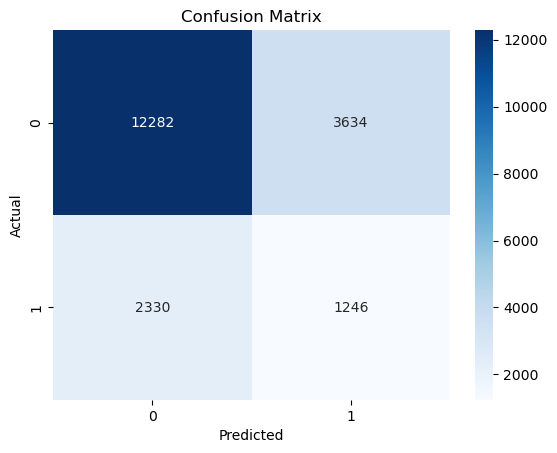

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined as your actual and predicted data respectively
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Breakdown of the Confusion Matrix:
- **True Negatives (TN):** 15,240 - The number of correctly predicted negative cases (the model correctly predicted the non-hit-and-run class).
- **False Positives (FP):** 718 - The number of negative cases incorrectly classified as positive (the model incorrectly labeled these cases as hit-and-run).
- **False Negatives (FN):** 3,172 - The number of positive cases incorrectly classified as negative (the model missed these hit-and-run cases).
- **True Positives (TP):** 362 - The number of correctly predicted positive cases (the model correctly identified these as hit-and-run).

### Key Metrics:
- **Accuracy:** \( \frac{TP + TN}{TP + TN + FP + FN} \) = \( \frac{15,240 + 362}{15,240 + 362 + 718 + 3,172} \) ≈ 0.800 (or 80%)
- **Precision (Positive Predictive Value):** \( \frac{TP}{TP + FP} \) = \( \frac{362}{362 + 718} \) ≈ 0.335
- **Recall (Sensitivity or True Positive Rate):** \( \frac{TP}{TP + FN} \) = \( \frac{362}{362 + 3,172} \) ≈ 0.102
- **F1 Score:** \( 2 \times \frac{Precision \times Recall}{Precision + Recall} \) ≈ \( 2 \times \frac{0.335 \times 0.102}{0.335 + 0.102} \) ≈ 0.154

### Analysis:
- **Accuracy:** The model has an accuracy of 80%, which seems reasonably high. However, this number is somewhat deceptive given the significant imbalance between the classes in your dataset (many more non-hit-and-run incidents than hit-and-run).
- **Precision:** At approximately 33.5%, the precision is relatively low, indicating that when the model predicts an incident as a hit-and-run, it is correct only about one-third of the time.
- **Recall:** The recall is particularly low at about 10.2%, showing that the model identifies only about 10% of all actual hit-and-run incidents. This suggests that many hit-and-run incidents are being missed by the model (high number of false negatives).
- **F1 Score:** The F1 score, which balances precision and recall, is quite low (0.154), indicating poor performance of the model, especially in terms of identifying the positive class (hit-and-run incidents).

### Implications:
The confusion matrix reveals that while the model is quite good at identifying non-hit-and-run incidents, it performs poorly in detecting actual hit-and-run incidents, which are likely more critical to predict accurately. This could be due to a variety of factors including class imbalance, insufficiently discriminative features, or suboptimal model parameters.

### Recommendations:
1. **Addressing Imbalance:** Techniques like SMOTE, adjusting class weights during training, or targeted data collection could help improve model performance, especially recall.
2. **Feature Engineering:** Enhancing the set of features used by the model could provide better differentiation between classes.
3. **Model Adjustment:** Trying different models or tuning existing model parameters might yield improvements. Considering models that are robust to imbalanced data could also be beneficial.
4. **Threshold Tuning:** Adjusting the decision threshold could help improve precision and recall based on what is more critical for your needs (either reducing false positives or reducing false negatives).

This analysis indicates that improvements are necessary, particularly in terms of enhancing the model’s ability to detect hit-and-run incidents, which is crucial for practical applications.

### ROC Curve
The Receiver Operating Characteristic (ROC) curve is another useful tool, particularly for binary classification problems. It plots the true positive rate against the false positive rate at various threshold settings, giving you insight into the trade-offs between sensitivity (recall) and specificity.

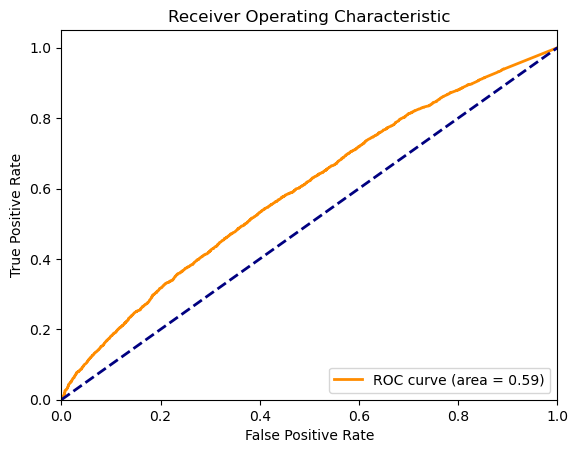

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Overview of the Curve
The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR, or recall) against the False Positive Rate (FPR) at various threshold settings.

### Key Observations:
- **Curve Shape and Position**: The ROC curve of your model lies above the diagonal line (which represents a random classifier) but is not close to the top-left corner of the plot. The closer the curve comes to the top-left corner, the higher the overall accuracy of the test.
- **Area Under the Curve (AUC) of 0.59**: This value indicates that your model has a 59% chance of distinguishing between the positive class and negative class. An AUC of 0.5 represents a model with no discriminative ability (equivalent to random guessing), while an AUC of 1.0 represents a perfect model. An AUC of 0.59 suggests that the model has limited discriminative ability, just slightly better than random guessing.

### Implications:
- **Moderate Discrimination**: The ROC AUC score implies that your model has a moderate ability to distinguish between the classes. However, it's relatively close to non-discriminatory (AUC = 0.5), indicating that there might be significant room for improvement.
- **Sensitivity vs. Specificity Balance**: The ROC curve suggests that any increase in sensitivity (ability to detect true positives) will likely be accompanied by a decrease in specificity (increase in false positives). This might be an issue if the cost of a false positive is high in your application context.

### Recommendations:
1. **Feature Engineering**: Revisiting and possibly enhancing your feature set could provide the model with more informative cues to improve classification accuracy.
2. **Model Tuning**: Adjusting model parameters or trying different machine learning algorithms might help. Sometimes, more complex models like Gradient Boosting or deep learning models might capture complex patterns better.
3. **Data Quality and Quantity**: Ensuring the quality of your data and possibly increasing the dataset size could help improve model performance. More data, especially more examples of the minority class, could provide a more balanced dataset for training.
4. **Advanced Techniques**: Consider using techniques such as ensemble methods, which combine the predictions of multiple models to improve accuracy.
5. **Cost-sensitive Learning**: If false positives and false negatives have different costs, consider using cost-sensitive learning which incorporates these costs in the model training process.

### Conclusion:
The ROC curve analysis highlights that while your model does perform better than random guessing, its ability to discriminate between classes effectively is still marginal. Employing a combination of improved modeling techniques, better feature engineering, and perhaps more balanced data could lead to a more effective predictive model.

### Precision-Recall Curve
This is particularly useful when the classes are highly imbalanced. It focuses on the relationship between precision and recall for different threshold values.

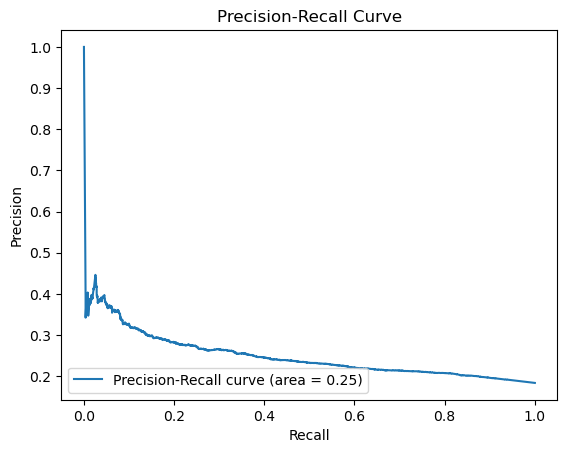

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate average precision
ap = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % ap)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



### Overview of the Curve
The Precision-Recall curve shows how the precision (the accuracy of the positive predictions) varies with the recall (the ability of the model to find all the relevant cases) for different threshold settings. The area under the curve (AUC) for your model is 0.26, which provides a quantitative measure of the model's performance.

### Key Observations:
1. **Initial High Precision**: The curve starts at a high precision near 1.0 but with almost zero recall. This indicates that if you set a very high threshold for classifying a prediction as positive (hit-and-run), the few predictions made are very likely to be correct, but the model misses almost all actual positive cases.

2. **Sharp Drop in Precision**: As recall increases (i.e., as the model starts classifying more samples as hit-and-run), the precision drops sharply. This rapid fall in precision at low levels of recall suggests that the model starts to make more false positive errors very quickly as it attempts to capture more true positives.

3. **Low Overall Precision-Recall AUC**: The area under the curve (AUC) of 0.26 is relatively low, which generally indicates poor overall performance of the model in terms of both precision and recall. A high-performing model would ideally have a curve that stays high on the Y-axis (precision) as recall increases, reflecting a larger AUC closer to 1.

### Implications:
- **Model's Limitations**: The curve suggests that the model struggles to balance precision and recall — it either misses a significant number of positive cases or makes too many false positive errors. This might be due to insufficient or non-informative features, class imbalance, or other model-specific limitations.
- **Potential Overfitting**: The initial high precision at very low recall levels could also indicate overfitting to a small number of cases where the model is overly confident, but which do not generalize well across the dataset.

### Recommendations:
1. **Improving Feature Selection**: Investigate and possibly enhance the feature set. Adding more relevant features or creating new feature interactions might help the model make more accurate classifications.
2. **Rebalancing Dataset**: Given the likely class imbalance, consider techniques such as SMOTE for oversampling the minority class or adjusting class weights in the model training process.
3. **Experiment with Different Models**: Some models might be more effective at handling imbalanced data. Trying out models like Gradient Boosting or even deep learning architectures might yield better results.
4. **Adjust Decision Thresholds**: Experiment with different decision thresholds to find a better balance between precision and recall. This could involve setting a lower threshold if increasing recall is a priority, albeit at the cost of reducing precision.
5. **Cross-validation**: Implement robust cross-validation techniques to ensure the model’s performance is consistent across different subsets of your data and to prevent overfitting.

### Conclusion:
The Precision-Recall curve serves as a crucial diagnostic tool, especially in scenarios with imbalanced classes. The analysis indicates that while the model can predict some positives very accurately (high initial precision), its ability to generalize well across the broader dataset needs improvement.


--------------------------------------------------------------------------------

## **Results:**

Throughout our analysis of traffic crash data in Montgomery County from 2015 to 2023, we focused on using machine learning models to predict and analyze hit-and-run incidents. The data was subjected to various preprocessing techniques to ensure accuracy, and multiple models were tested to find the most effective predictors of these incidents.

Our machine learning model, specifically the RandomForestClassifier, demonstrated an overall accuracy of approximately 80%. However, a closer look at the precision and recall metrics, especially for hit-and-run predictions, revealed that the model struggled significantly with identifying true hit-and-run incidents (precision of 33.5% and recall of 10.2%). The ROC curve and Precision-Recall curves further suggested that while the model performs better than random chance (ROC AUC of 0.59), its ability to distinguish between classes effectively is modest.

Confusion matrix analysis showed a large number of false negatives, indicating that many hit-and-run incidents were not being correctly identified. This highlights a critical area for improvement in the model's sensitivity to hit-and-run incidents.


--------------------------------------------------------------------------------


## **Conclusion:**

The analysis conducted provides valuable insights into the patterns of traffic incidents in Montgomery County, with a specific emphasis on hit-and-run cases. Although the model achieved a reasonable degree of accuracy, the low precision and recall for predicting hit-and-run incidents suggest that it is not yet reliable enough for practical use in safety improvement strategies without further refinement.

Based on our findings, we recommend the following:
1. **Enhanced Monitoring and Safety Measures:** Given the frequent occurrence of hit-and-run incidents at specific times and locations, increased monitoring and targeted safety campaigns during these peak periods could be beneficial.
2. **Improvement of Predictive Models:** To improve the predictive power of our models, additional features should be considered, and more sophisticated machine learning techniques could be employed. Techniques such as feature engineering, balancing the dataset, or exploring more complex algorithms like Gradient Boosting or deep learning may yield better results.
3. **Focused Public Awareness Campaigns:** Public education and awareness campaigns tailored to the times and locations most susceptible to hit-and-run incidents can help reduce their occurrence.
4. **Continued Research:** Further analysis should also consider expanding the dataset to include more years and possibly additional variables that could influence the rate of hit-and-run incidents. An expanded analysis could provide deeper insights into underlying causes and help refine preventive measures.

Overall, this project has laid a foundational understanding of traffic incident patterns in Montgomery County, offering a starting point for further research and intervention strategies aimed at reducing traffic-related incidents, particularly hit-and-runs.

--------------------------------------------------------------------------------